# Week 8 - Logistic Regression and Clustering
### Data Science Bootcamp Spring 2025


---





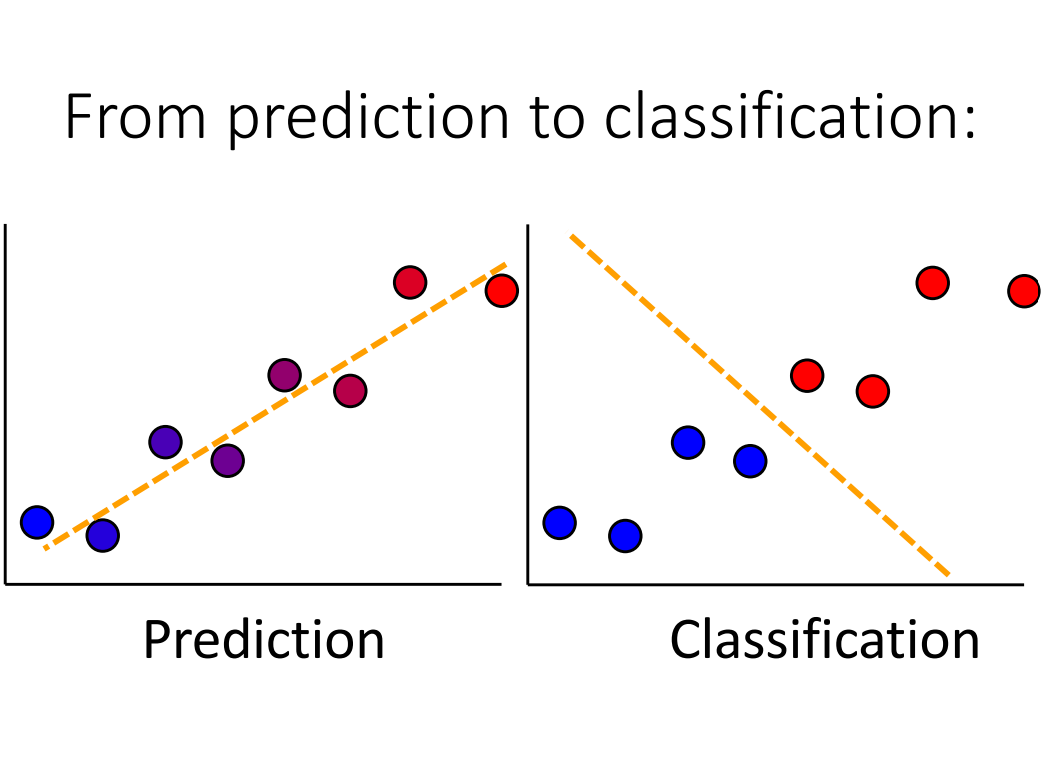

## Classification:

Suppose we have a series of data points {(𝐱𝟏
, 𝑦1
), (𝐱𝟐
, 𝑦2
), … , (𝐱𝐧, 𝑦𝑛)} and there is some (unknown)
relationship between 𝐱𝐢
and 𝑦𝑖
.

• Classification: The output variable 𝑦 is constrained to be ∈ 1, 2, ⋯ , 𝐾

• Binary classification: The output variable 𝑦 is constrained to be ∈ 0, 1

## Recap


Recall the simple linear regression equation is $y = \beta_0 + \beta_1x$

$\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the `x` predictor.


```
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.intercept_, linear_reg.coef_)
```




**Coefficient interpretation:** A 1-unit increase in `x` is associated with a `β1`-unit change in `y`.

**Intercept interpretation:** When `x = 0`, the estimated value of `y` is $\beta_0$


<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, `but what about when we want to predict membership in a class or category?`

## Toy Example

` You want to predict if a candidate will get hired by a company or not `

Things you might consider when making this decision -
1. `GPA`
2. `Experience`
3. `Portfolio`
4. `Skills`
5. `Education` ...



## Lets plot GPA against Hired?

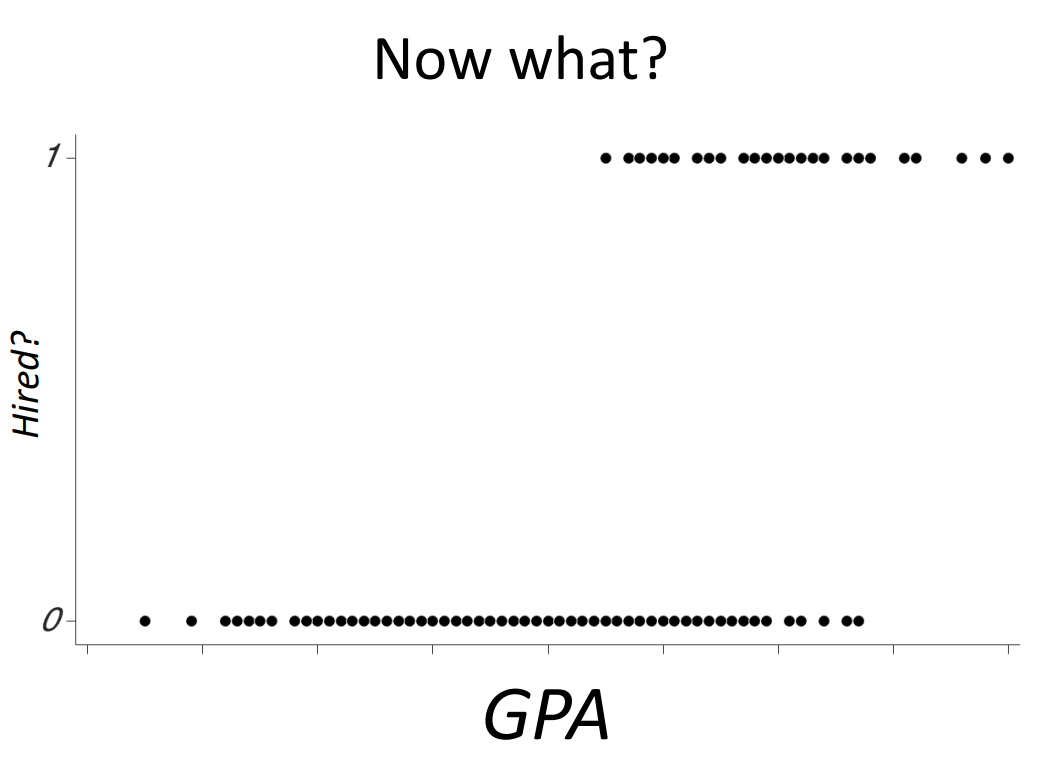

## Can we apply a Linear Regression model?

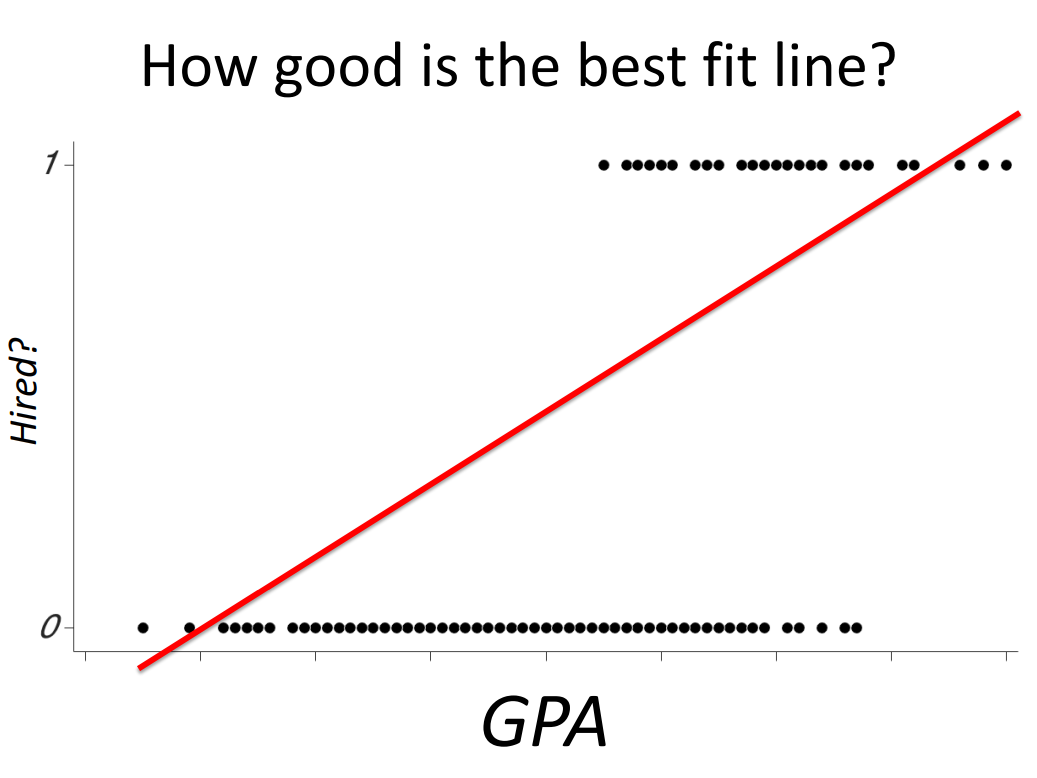

# `Just because we can, doesn't mean we should!`

Issues with Linear Regression in this case -
1. It assumes that the data is distributed normally. Here, the outcomes are either `0 or 1 (binary)`. Definitely, not normal!

2. Effect of unit change is assumed to be constant

3. Linear Regressions is unbounded


Hence, we need something else in this case.




---

## Logistic Regression

* A `nonlinear model` that links the predictor and the outcomes
* We model the `odds` of an outcome happening



> odds = $\frac{p}{1-p}$

eg. if p = 0.5  -> odds = 1:1

eg. if p = 0.75 -> odds = 3:1


## How does Logistic Regression work?

Linear regression: Continuous response is modeled as a linear combination of the features.

$$z = \beta_0 + \beta_1x$$

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the `logit function`.

Probability is sometimes written as π.

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1



`We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?`


- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems.
- Multinomial logistic regression, on the other hand, can solve this as a single problem, but how this works is beyond the scope of this lesson. Hint: use softmax function.

## Lets fit a Logistic Regression model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [3]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [5]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

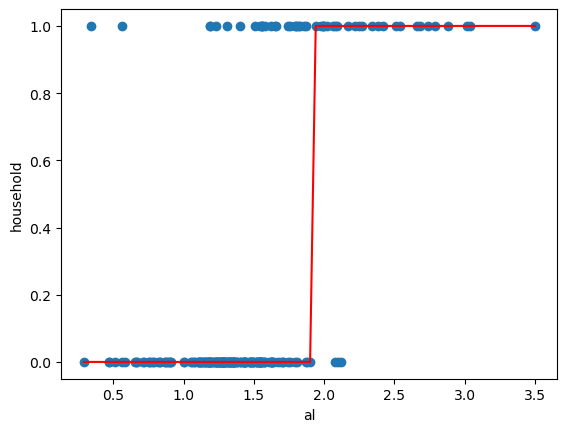

In [7]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [8]:
logreg.predict_proba(X)[:15]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938],
       [0.98058638, 0.01941362],
       [0.97806663, 0.02193337],
       [0.97738831, 0.02261169],
       [0.9752281 , 0.0247719 ],
       [0.9752281 , 0.0247719 ]])

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [9]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [10]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


Text(0, 0.5, 'household')

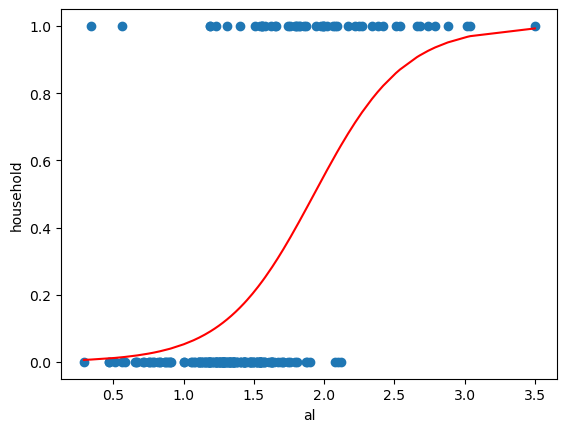

In [11]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

## Interpreting the coeffecients

**Interpretation:** A 1-unit increase in `al` is associated with a 2.01-unit increase in the log odds of `household`.

Positive coefficients increase the log odds of the response (and thus increase the probability), and negative coefficients decrease the log odds of the response (and thus decrease the probability).

## How good are our predictions?

In [12]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]], dtype=int64)

In [13]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy
#(TN+TP)/(TN+TP+FN+FP)

0.8691588785046729

In [14]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision
#(TP)/(TN+TP)


0.896551724137931

In [15]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall
#(TP)/(TP+FN)


0.5098039215686274

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [17]:
precision_score(y_true=y, y_pred=pred)

0.896551724137931

In [18]:
recall_score(y,pred)

0.5098039215686274

### The Accuracy Paradox

Accuracy is a very intuitive metric — it's a lot like an exam score where you get total correct/total attempted. However, accuracy is often a poor metric in application. There are many reasons for this:
- Imbalanced problems with 95% positives in the baseline will have 95% accuracy even with no predictive power.
  - This is the paradox; pursuing accuracy often means predicting the most common class rather than doing the most useful work.
- Applications often have uneven penalties and rewards for true positives and false positives.
- Ranking predictions in the correct order be more important than getting them correct.
- In many case we need to know the exact probability of a positives and negatives.
  - To calculate an expected return.
  - To triage observations that are borderline positive.

**Some of the most useful metrics for addressing these problems are:**
    
- **Classification accuracy/error**
  - Classification accuracy is the percentage of correct predictions (higher is better).
  - Classification error is the percentage of incorrect predictions (lower is better).
  - Easiest classification metric to understand.
- **Confusion matrix**
  - Gives you a better understanding of how your classifier is performing.
  - Allows you to calculate sensitivity, specificity, and many other metrics that might match your business objective better than accuracy.
  - Precision and recall are good for balancing misclassification costs.



The good news is that these are readily available in Python and R, and are usually easy to calculate once you know about them.

## How do we know what threshold to set?

- ROC Curve Construction: For each threshold value, calculate the TPR and FPR.
Plot these values on a graph with TPR on the y-axis and FPR on the x-axis. This generates the ROC curve.

- Interpretation: The ROC curve provides a visual representation of the trade-off between sensitivity (TPR) and specificity (1 - FPR) for different threshold values. A curve that is closer to the top-left corner indicates better performance, as it represents higher sensitivity and lower false positive rate across various threshold settings.

- Area Under the Curve (AUC): AUC is calculated by measuring the area under the ROC curve. AUC provides a single scalar value summarizing the model's performance. Higher AUC values indicate better discrimination ability of the model across all threshold settings, with 1 being perfect and 0.5 indicating no discrimination ability (random guessing).

In summary, the ROC curve helps in evaluating the performance of a classification model by illustrating its ability to discriminate between positive and negative classes across different threshold settings.

## Practice Questions:
1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

2. Do the same analysis for other columns

3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

4. Plot ROC Curves for each model

In [ ]:
"""
Question 1. Try different thresholds for computing predictions. 
By default it is 0.5. 

Use predict_proba function to compute probabilities and then 
try custom thresholds and see their impact on 
Accuracy, Precision and Recall
"""

📌 The threshold is the cutoff you choose to convert probabilities into actual class labels. 

If threshold = 0.5 (default):

- 0.85 → 1

- 0.30 → 0

- 0.65 → 1

- 0.48 → 0

- 0.95 → 1

🎯 Why change the threshold?
- Lower threshold (e.g., 0.3) → More items classified as class 1
→ 🔼 Recall, 🔽 Precision

- Higher threshold (e.g., 0.7) → Fewer items classified as class 1
→ 🔼 Precision, 🔽 Recall

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predicted probabilities for class 1 (household = 1)
probs = glass['household_pred_prob']

# Try different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Store evaluation metrics
results = []

for threshold in thresholds:
    custom_pred = (probs >= threshold).astype(int)
    
    acc = accuracy_score(y, custom_pred)
    prec = precision_score(y, custom_pred)
    rec = recall_score(y, custom_pred)
    
    results.append({
        'Threshold': threshold,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec
    })

# Convert to DataFrame for better display
results_df = pd.DataFrame(results)
results_df

,Threshold,Accuracy,Precision,Recall
0,0.3,0.864486,0.720000,0.705882
1,0.4,0.878505,0.820513,0.627451
2,0.5,0.869159,0.896552,0.509804
3,0.6,0.841121,0.869565,0.392157
4,0.7,0.836449,1.000000,0.313725


In [ ]:
# Question 2. Do the same analysis for other columns

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Columns to test (excluding 'Type' and 'household')
feature_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Store all results here
all_results = []

for col in feature_columns:
    # Prepare data
    X = np.array(glass[col]).reshape(-1, 1)
    y = glass['household']

    # Fit logistic regression model
    model = LogisticRegression()
    model.fit(X, y)

    # Predict probabilities
    probs = model.predict_proba(X)[:, 1]

    # Evaluate for multiple thresholds
    for t in thresholds:
        preds = (probs >= t).astype(int)
        acc = accuracy_score(y, preds)
        prec = precision_score(y, preds, zero_division=0)
        rec = recall_score(y, preds)

        all_results.append({
            'Feature': col,
            'Threshold': t,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec
        })

# Convert to DataFrame for analysis
threshold_results_df = pd.DataFrame(all_results)
threshold_results_df

,Feature,Threshold,Accuracy,Precision,Recall
0,RI,0.3,0.761682,0.000000,0.000000
1,RI,0.4,0.761682,0.000000,0.000000
2,RI,0.5,0.761682,0.000000,0.000000
3,RI,0.6,0.761682,0.000000,0.000000
4,RI,0.7,0.761682,0.000000,0.000000
5,Na,0.3,0.827103,0.625000,0.686275
6,Na,0.4,0.859813,0.756098,0.607843
7,Na,0.5,0.855140,0.857143,0.470588
8,Na,0.6,0.822430,0.882353,0.294118
9,Na,0.7,0.803738,1.000000,0.176471


In [ ]:
# Question 3. Fit a Logistic Regression Model on all features. 
# Remember to preprocess data(eg. normalization and one hot encoding)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Step 1: Define features and target
X = glass.drop(columns=['Type', 'household'])  # Drop target and categorical
y = glass['household']                         # Binary target

# Step 2: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split (to evaluate performance on unseen data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Fit logistic regression model
logreg_all = LogisticRegression()
logreg_all.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = logreg_all.predict(X_test)
y_prob = logreg_all.predict_proba(X_test)[:, 1]  # For optional threshold tuning

# Step 6: Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Step 7: Output results
print("Confusion Matrix:\n", cm)
print(f"\nAccuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")

Confusion Matrix:
 [[46  3]
 [ 2 14]]

Accuracy:  0.92
Precision: 0.82
Recall:    0.88


In [ ]:
# Question 4. Plot ROC Curves for each model

### Question 4: What Are ROC Curves and How Do We Interpret Them?

#### ✅ What is an ROC Curve?

An **ROC (Receiver Operating Characteristic) curve** is a graphical representation of a classification model’s ability to distinguish between the positive and negative classes across **different threshold values**.

The ROC curve plots:

- **True Positive Rate (TPR)** = Recall  
  = TP / (TP + FN)

**against**

- **False Positive Rate (FPR)**  
  = FP / (FP + TN)

---

#### 📈 How to Read the ROC Curve:

- The **closer the curve is to the top-left corner**, the better the model is at distinguishing between the classes.
- A **diagonal line** represents a model that performs **no better than random guessing**.
- The **Area Under the Curve (AUC)** summarizes the ROC curve into a single value:
  - AUC = 1.0 → perfect classifier
  - AUC = 0.5 → random guessing
  - AUC < 0.5 → worse than random (usually a modeling mistake)

---

#### 🎯 Why ROC Curves Are Useful:

- ROC curves are **threshold-independent** — they show model performance across **all thresholds**, not just at 0.5.
- Great for comparing multiple models or evaluating **trade-offs between TPR and FPR**.
- Especially useful when class imbalance exists.

---

#### 🔍 In This Assignment:

- You plotted ROC curves for **each individual feature** (e.g., Al, Na, Mg, etc.) used in a logistic regression model.
- You also plotted the ROC curve for the model using **all features combined**.
- The **AUC values** in the legend show which features/models perform best in distinguishing household vs. non-household glass.

> **In summary:** ROC curves help visualize how well a model separates classes at various thresholds, and the AUC score quantifies this ability

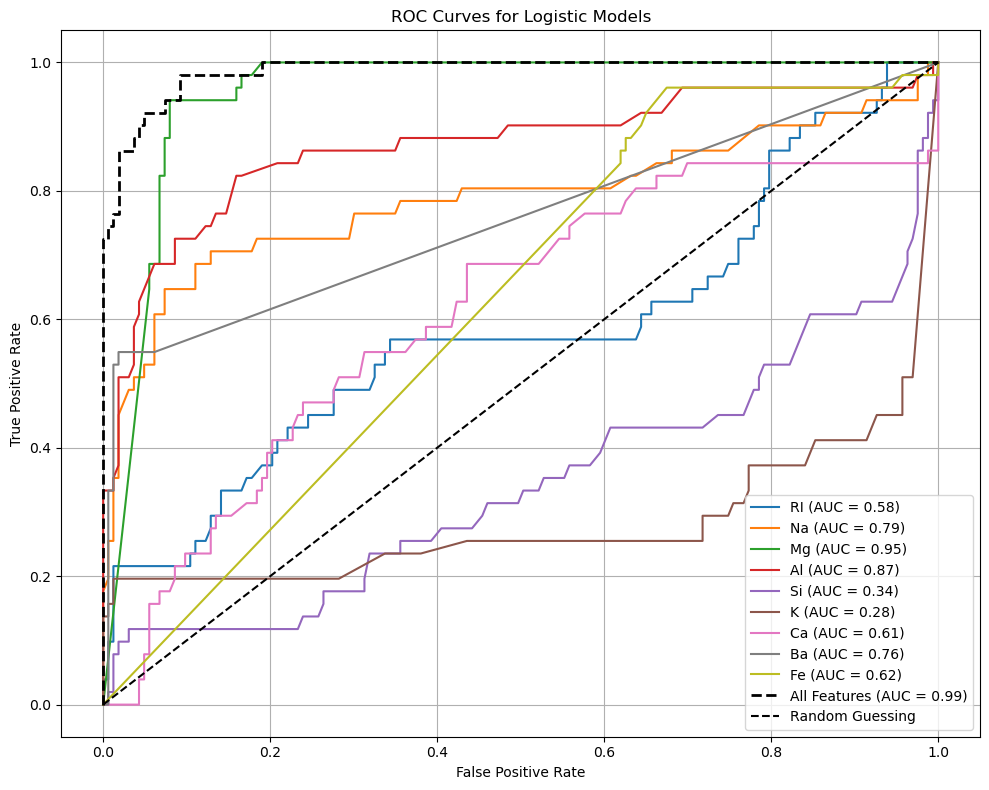

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Define thresholds and colors
feature_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
plt.figure(figsize=(10, 8))

# Step 2: Plot ROC for each individual feature
for col in feature_columns:
    X_single = np.array(glass[col]).reshape(-1, 1)
    y = glass['household']
    
    model = LogisticRegression()
    model.fit(X_single, y)
    
    prob = model.predict_proba(X_single)[:, 1]
    fpr, tpr, _ = roc_curve(y, prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{col} (AUC = {roc_auc:.2f})")

# Step 3: Plot ROC for model using all features (with scaling)
from sklearn.preprocessing import StandardScaler

X_all = glass.drop(columns=['Type', 'household'])
y_all = glass['household']
X_scaled = StandardScaler().fit_transform(X_all)

model_all = LogisticRegression()
model_all.fit(X_scaled, y_all)
prob_all = model_all.predict_proba(X_scaled)[:, 1]
fpr_all, tpr_all, _ = roc_curve(y_all, prob_all)
roc_auc_all = auc(fpr_all, tpr_all)

plt.plot(fpr_all, tpr_all, color='black', linewidth=2, linestyle='--', label=f"All Features (AUC = {roc_auc_all:.2f})")

# Step 4: Final plot formatting
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Logistic Models")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

---
---

# Clustering

(Unsupervised Learning)

---
---

### Helpful uses for clustering:
   - Find items with similar behavior (users, products, voters, etc)
   - Market segmentation
   - Understand complex systems
   - Discover meaningful categories for your data
   - Reduce the number of classes by grouping (e.g. bourbons, scotches -> whiskeys)
   - Reduce the dimensions of your problem
   - Pre-processing! Create labels for supervised learning

## K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster.
5. Repeat steps 3-4 until your centroids converge.

# Metrics for assessing your clusters

**Inertia** -- sum of squared errors for each cluster
- low inertia = dense clusters
- Ranges from -inf to +inf

**Silhouette Score** -- measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated


### Inertia

sum of squared errors for each cluster

- low inertia = dense cluster

$$\sum_{j=0}^{n} (x_j - \mu_i)^2$$

where $\mu_i$ is a cluster centroid. (K-means explicitly tries to minimize this.)

`.inertia_` is an attribute of sklearn's kmeans models.


### Silhouette Score

measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated

The definition is a little involved$^*$, but intuitively the score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.

We can calculate it in sklearn with `metrics.silhouette_score(X_scaled, labels, metric='euclidean')`.

* <https://en.wikipedia.org/wiki/Silhouette_(clustering)>


### Demo

In [23]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [24]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


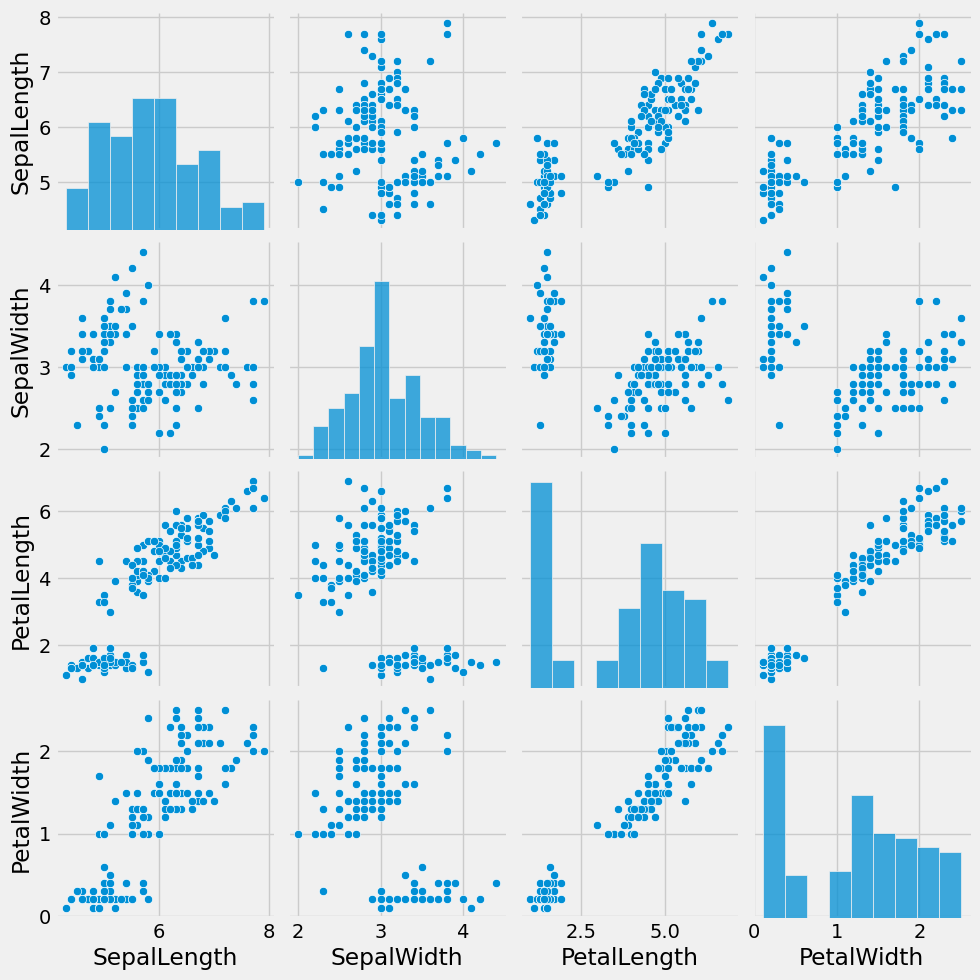

In [25]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

Next, since each of our features have different units and ranges, let's do some preprocessing:

In [26]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [27]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Now that we've formatted our data and understand its structures, we can finally go ahead and cluster.

We're going to set k = 2, given the pattern we were seeing above in our graphs.

In [28]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [29]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [30]:
print(labels,centroids)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1] [[0.19611111 0.59083333 0.07864407 0.06      ]
 [0.545      0.36333333 0.6620339  0.65666667]]


In [31]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.6294675561906644

How to choose Value of k?

In [32]:
score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))



C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'Score')

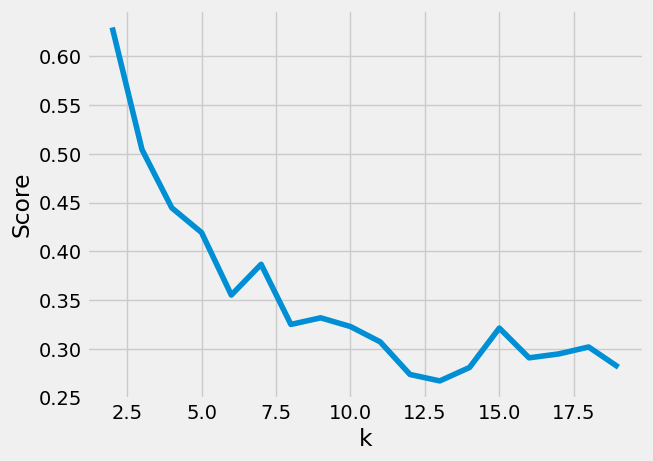

In [37]:
plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

In [33]:
inertia_score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  inertia_score.append(inertia)

C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'Inertia')

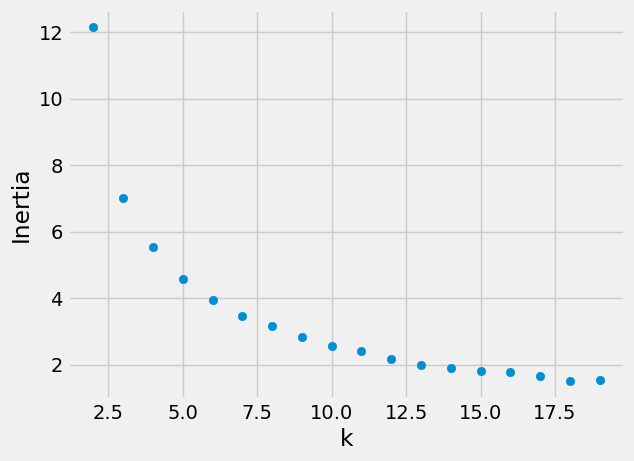

In [34]:
plt.scatter(list(range(2,20)),inertia_score)
plt.xlabel('k')
plt.ylabel('Inertia')

The curve we obtain is called the Elbow curve. We want to stop changing the value of k when the distance between two k values does not change much.


...and we're done! You've completed your first clustering analysis.

Let's see how it looks. First, let's put the labels columns into our dataframe

In [35]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,3
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,3


Let's plot each cluster in a different color. Seaborn has a 'hue' parameter we can use for this.

C:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


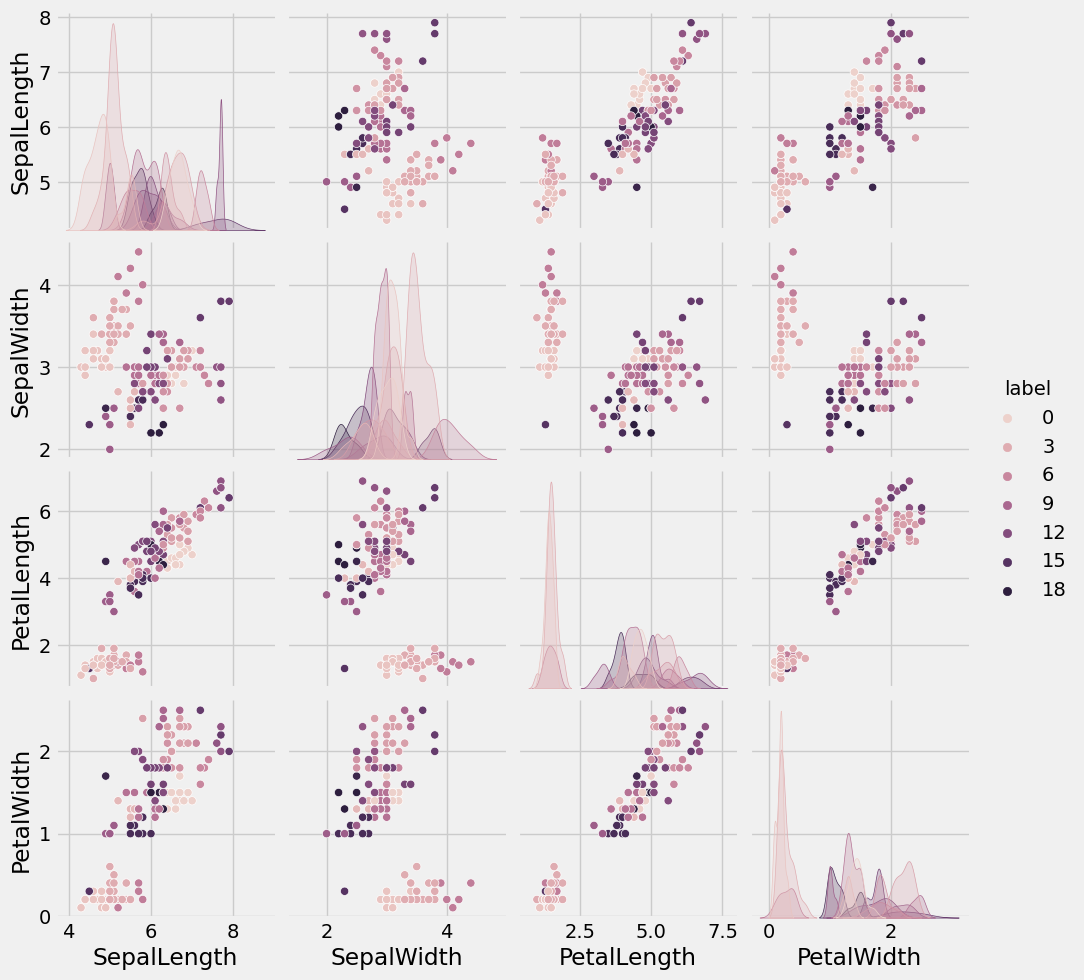

In [36]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

C:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


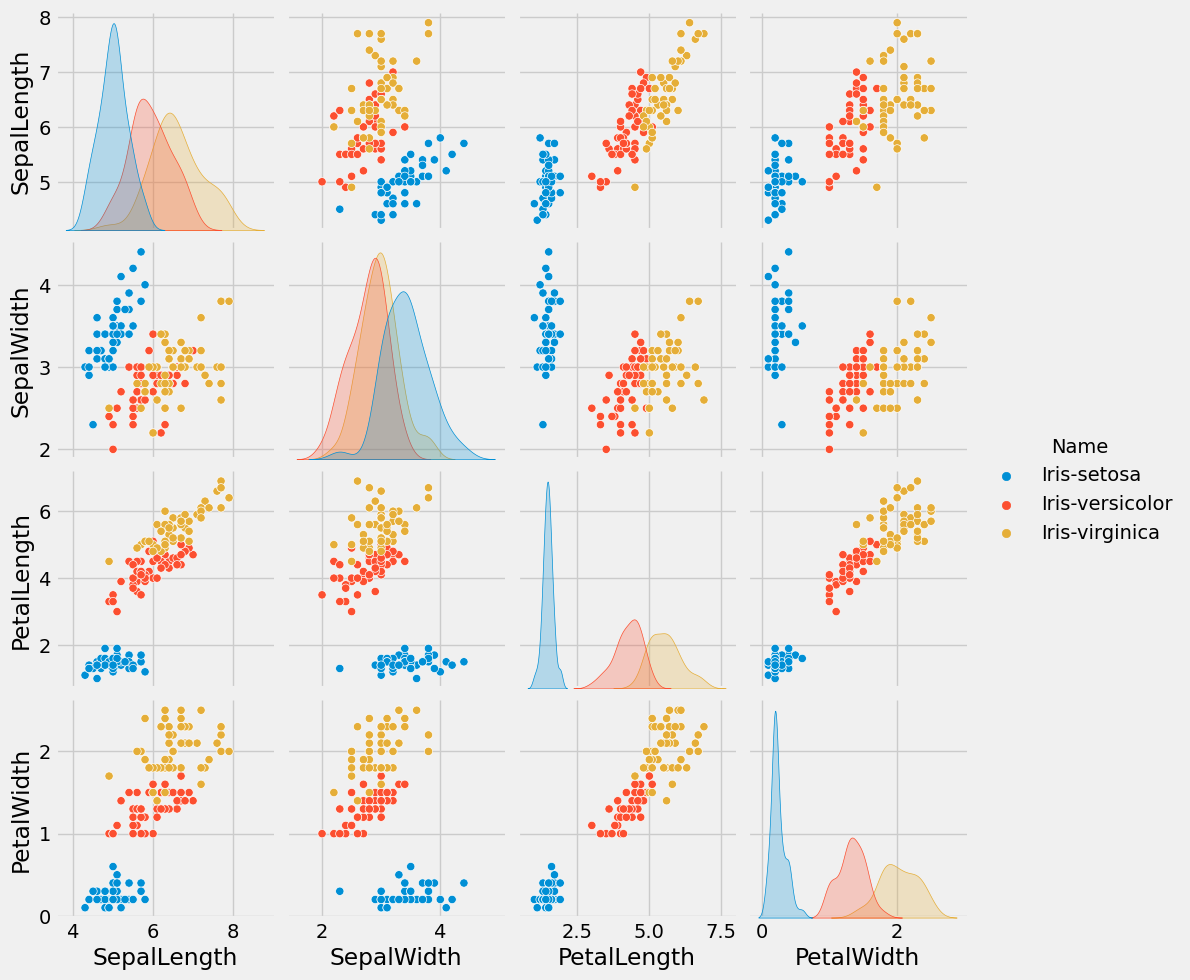

In [37]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

### Practice questions:
1. Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?


2. Repeat the following exercise for food nutrients dataset


In [ ]:
"""
Question 1. Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?
"""

### K-Means Clustering: Exploring Different Values of \( k \)

#### 🔍 What We're Doing:
- Run K-Means clustering for different values of \( k \) (e.g., 2 to 10)
- Track:
  - **Inertia**: total within-cluster sum of squares (measures compactness)
  - **Silhouette Score**: how well-separated the clusters are
- Compare results **with and without feature scaling**

---

#### 📈 Metrics to Track

- **Inertia** (a.k.a. WCSS – within-cluster sum of squares):
  - Measures how close data points are to their assigned cluster centroid.
  - ⚠️ Always decreases as \( k \) increases — doesn't tell you the "best" \( k \) alone.

- **Silhouette Score**:
  - Ranges from -1 to 1
  - Higher = better separation and cohesion
  - Good for identifying the ideal number of clusters

---

#### 💡 Questions to Answer

- How do **inertia** and **silhouette** change with different \( k \)?
- What happens when you **don’t scale features**?
- Is there a **"right" \( k \)?**

> **Short Answer**:  
> There's no universally "correct" \( k \). You choose based on:
> - Business/domain context
> - Metrics like silhouette score
> - Visual methods (e.g., elbow method)


C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

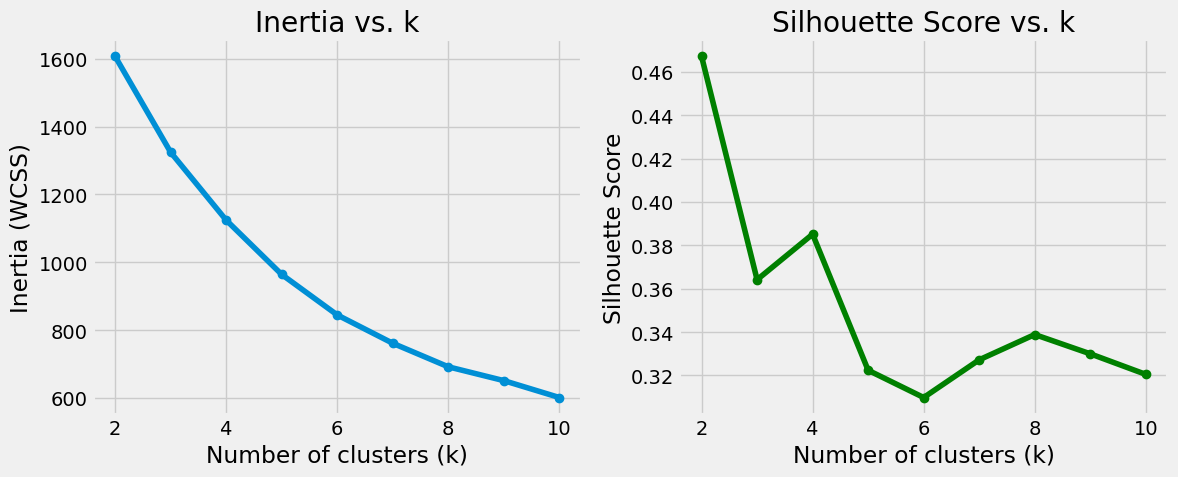

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Use glass dataset (drop target columns)
features = glass.drop(columns=['Type', 'household'])

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Range of k values to test
k_values = range(2, 11)
inertia_scores = []
silhouette_scores = []

# Run KMeans on scaled features
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features_scaled)
    
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, labels))

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_scores, marker='o')
plt.title('Inertia vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### Question: Analyzing Inertia and Silhouette Scores for Different Values of \( k \)

---

#### 📉 Inertia vs. \( k \) (Elbow Method)

- **Inertia** measures the total within-cluster variance (compactness).
- It **always decreases** as the number of clusters \( k \) increases.
- We're looking for the **"elbow" point** — where inertia starts to decrease more slowly.

📌 In the plot, the elbow appears around **k = 3 or 4**.  
Adding more clusters after this point yields only marginal improvements in inertia.

---

#### 📈 Silhouette Score vs. \( k \)

- The **Silhouette Score** evaluates how well-separated the clusters are.
- It ranges from **-1 to 1**, with higher values indicating better-defined clusters.
- A higher score means that clusters are both tight and well-separated.

📌 In the plot, the highest silhouette score is at **k = 2**,  
but it drops sharply afterward. A local peak also appears at **k = 4**.

---

### 🧠 Interpretation

- **k = 2** provides the highest silhouette score, but may oversimplify the structure.
- **k = 4** offers a good balance: relatively low inertia and decent silhouette score.
- There's no universally “correct” \( k \) — it depends on:
  - The shape of the data
  - Business or domain goals
  - Balance between simplicity and performance

---

### ❓ What If You Don't Scale Your Features?

- Features with larger scales (e.g., `RI`, `K`) will dominate the clustering.
- This leads to **distorted clusters** and poor performance.
- 🔑 **Always scale or normalize features** before applying K-Means.

---

> **Conclusion**:  
> Use both **Inertia (Elbow Method)** and **Silhouette Score** to guide your choice of \( k \), but always combine them with visual inspection and domain knowledge.


In [ ]:
# Question 2. Repeat the following exercise for food nutrients dataset

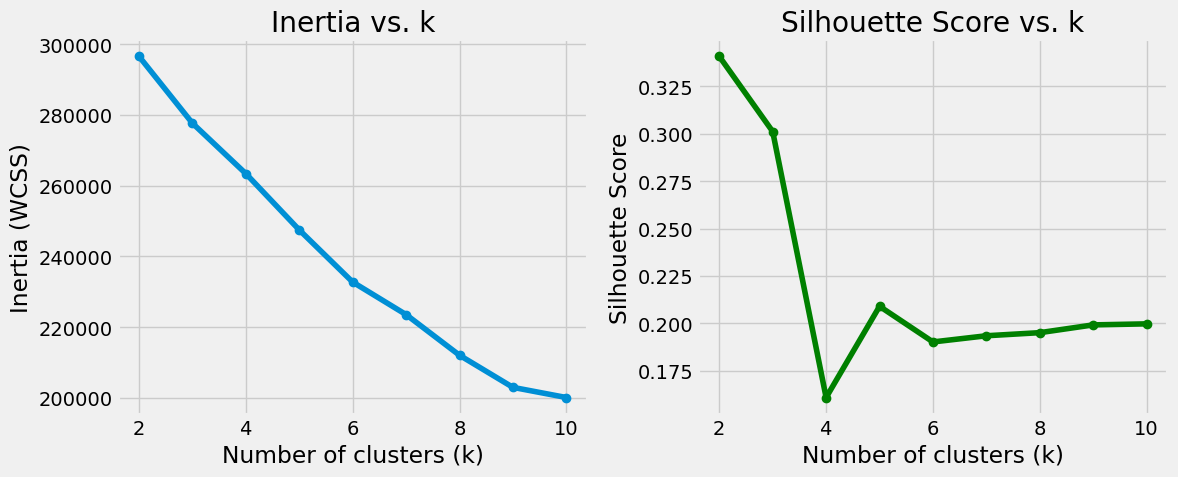

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load food nutrients dataset
# Replace with actual path if needed
# https://www.kaggle.com/datasets/shrutisaxena/food-nutrition-dataset?resource=download
food = pd.read_csv("food.csv")  

# Drop non-numeric or irrelevant columns (e.g., 'Food Name', 'Category' etc.)
X = food.select_dtypes(include=np.number)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different values of k
k_range = range(2, 11)
inertia = []
silhouette = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Inertia vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, marker='o', color='green')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


### Question 2: Clustering Analysis on Food Nutrients Dataset

---

#### 📉 Inertia vs. \( k \)

- Inertia continues to **decrease steadily** as \( k \) increases.
- This is expected: more clusters → tighter groups → lower within-cluster variance.
- However, there is **no clear elbow point**, meaning there's no single obvious value of \( k \) where improvement slows significantly.
- The curve flattens slightly around **k = 8–10**, suggesting diminishing returns after that point.

---

#### 📈 Silhouette Score vs. \( k \)

- The **highest silhouette score** occurs at **k = 2**, suggesting that a **simple 2-cluster solution** gives the clearest separation.
- The score **drops quickly at \( k = 4 \)** and stays relatively low and flat after that.
- Silhouette scores between **0.17–0.22** in the range of \( k = 5 \) to \( k = 10 \) indicate **less distinct clusters** as \( k \) increases.

---

### 🧠 Interpretation

- **k = 2 or 3** gives the best separation in terms of silhouette score.
- The inertia curve suggests **continued compactness gains** with more clusters, but **without much added clarity** (as shown by silhouette).
- **No single "right" \( k \)** — it depends on:
  - Your goals (e.g., coarse grouping vs. fine segmentation)
  - Domain knowledge (e.g., nutritional categories)

---

### ⚠️ Note on Scaling:
This analysis assumes that the features were **standardized (normalized)** before clustering.  
If not, features with larger numeric scales (like Calories or Sodium) could **dominate the distance metric**, leading to poor clustering performance.

---

> **Conclusion**:  
> Based on these results, \( k = 2 \) or \( k = 3 \) offers the most distinct cluster structure.  
> But depending on application (e.g., health food vs. junk food vs. supplements), a larger \( k \) might still be meaningful.


## Further reading

- The [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html) has a great summary of many other clustering algorithms.
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) is one popular alternative.
- This [PyData talk](https://www.youtube.com/watch?v=Mf6MqIS2ql4) is good overview of clustering, different algorithms, and how to think about the quality of your clusters.

# Thank you!